Importing necessary modules:

In [26]:
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit_machine_learning.algorithms import VQC
from qiskit_algorithms.optimizers import COBYLA, P_BFGS

Loading the Iris dataset

In [2]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

scaler = MinMaxScaler(feature_range=(0, 2))
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Dataset visualization

<Axes: >

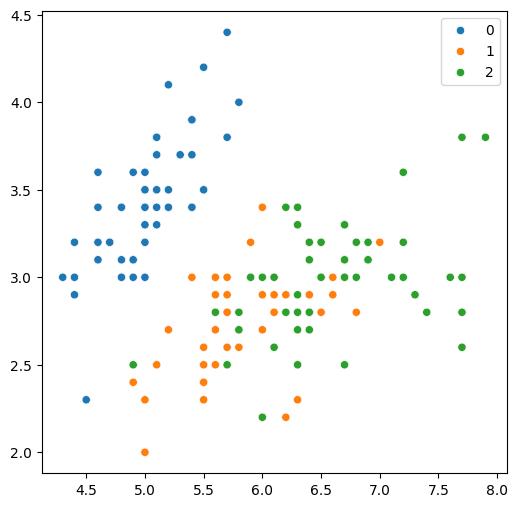

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (6, 6)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="tab10")

Preparing ZZFeatureMap for feature encoding

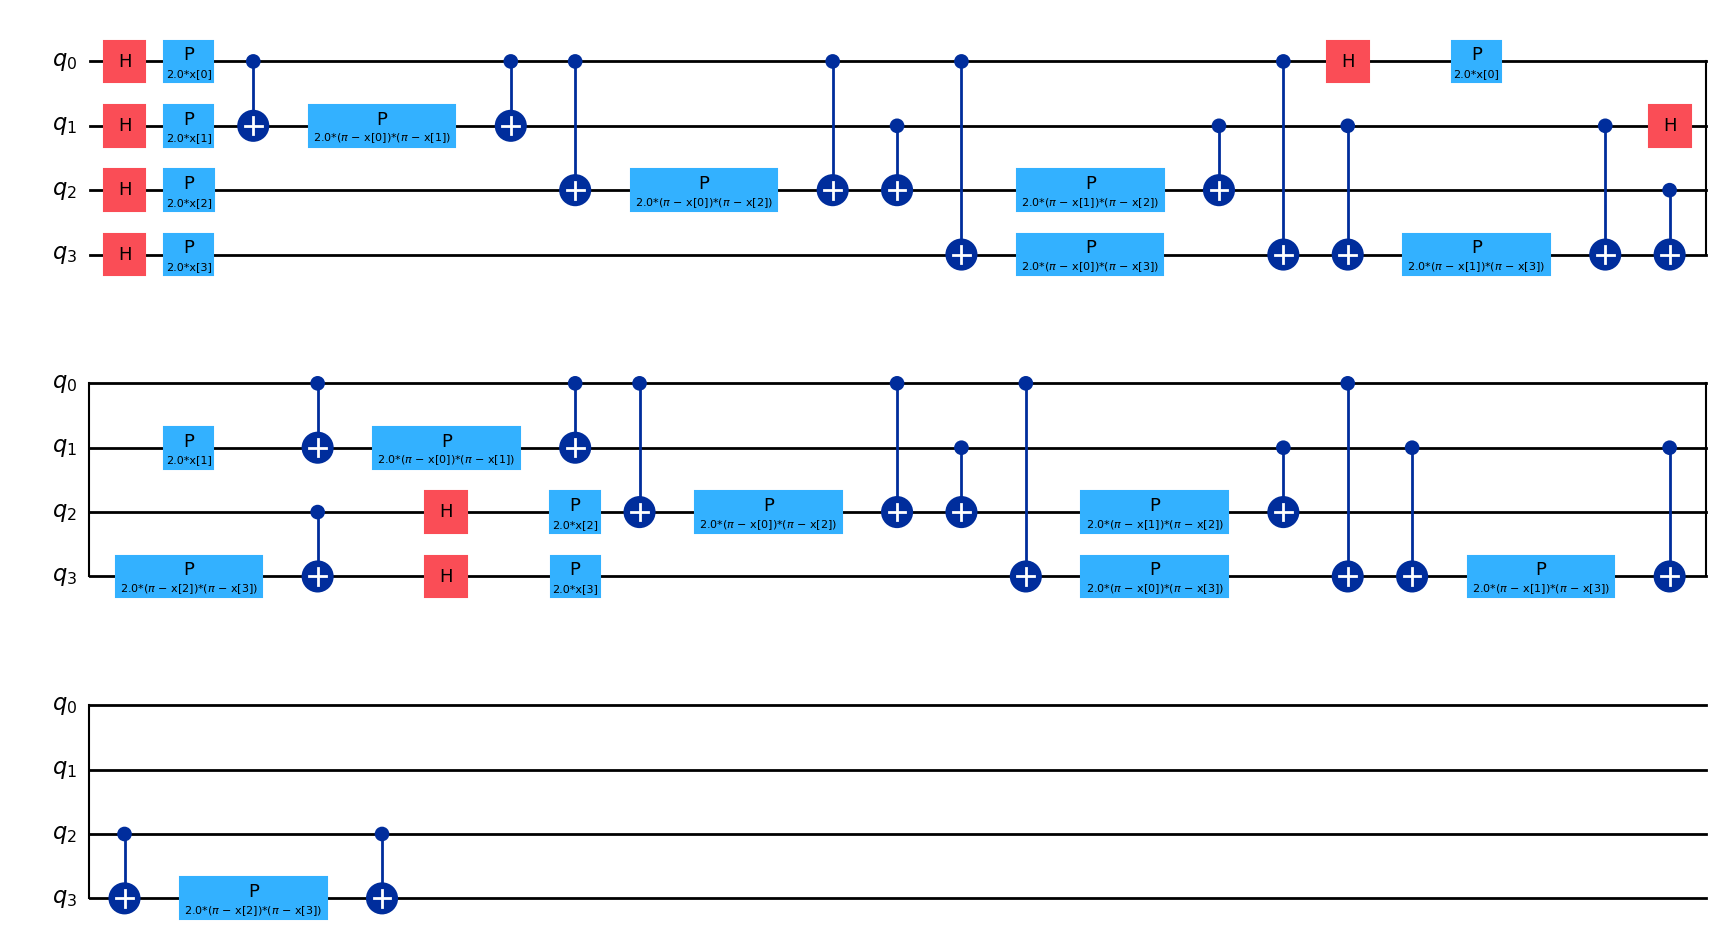

In [14]:
num_qubits = X_train.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_qubits, reps=2)
feature_map.decompose().draw(output='mpl')

Preparing an ansatz with RealAmplitudes

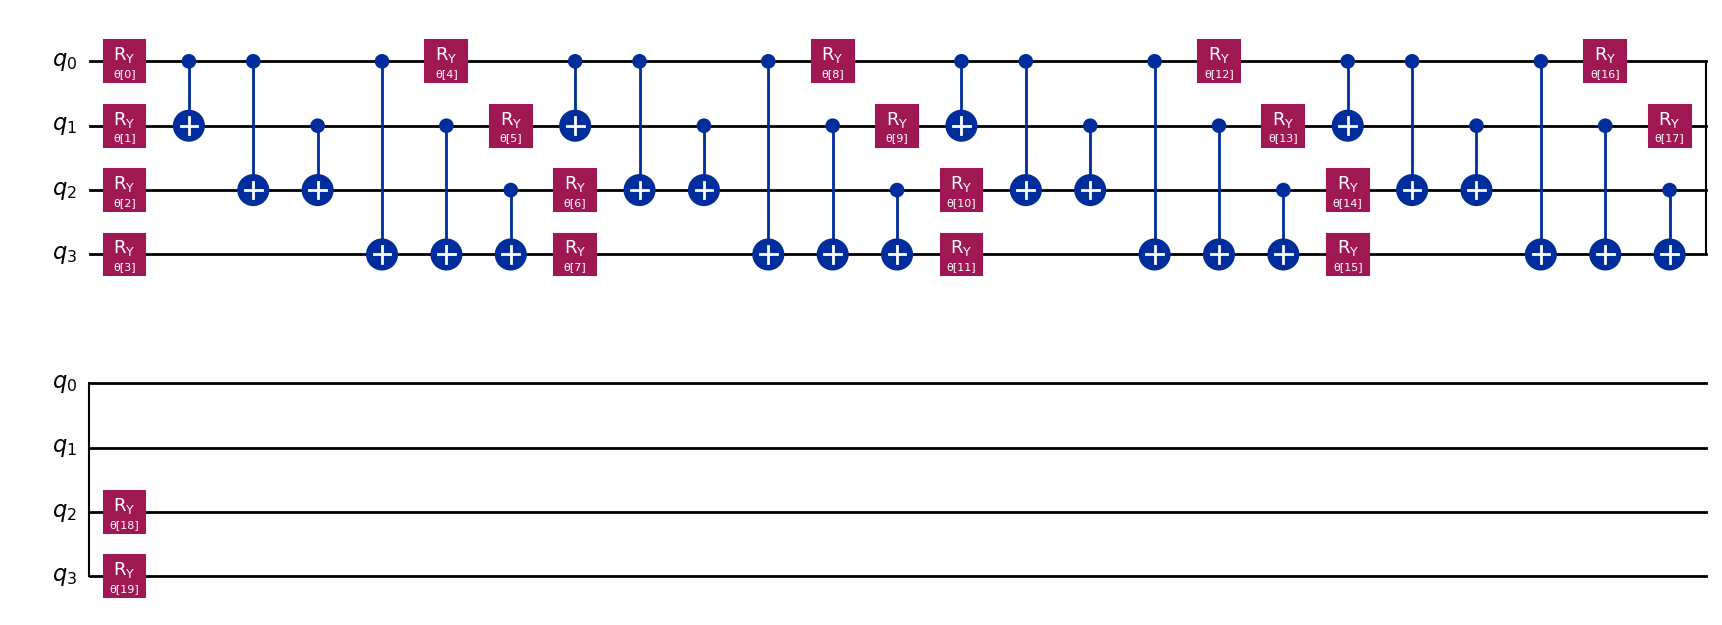

In [20]:
ansatz = RealAmplitudes(num_qubits=num_qubits, entanglement="full", reps=4)
ansatz.decompose().draw(output='mpl')

Defining a callback function for visualizing loss

In [16]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Loss Landscape")
    plt.xlabel("Iteration")
    plt.ylabel("Cross-Entropy Loss")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

Training the VQC with COBYLA optimizer:

In [21]:
optimizer = COBYLA(maxiter=400)
objective_func_vals = []

vqc = VQC(num_qubits=num_qubits,
           feature_map=feature_map,
           ansatz=ansatz,
           optimizer=optimizer,
           callback=callback_graph)

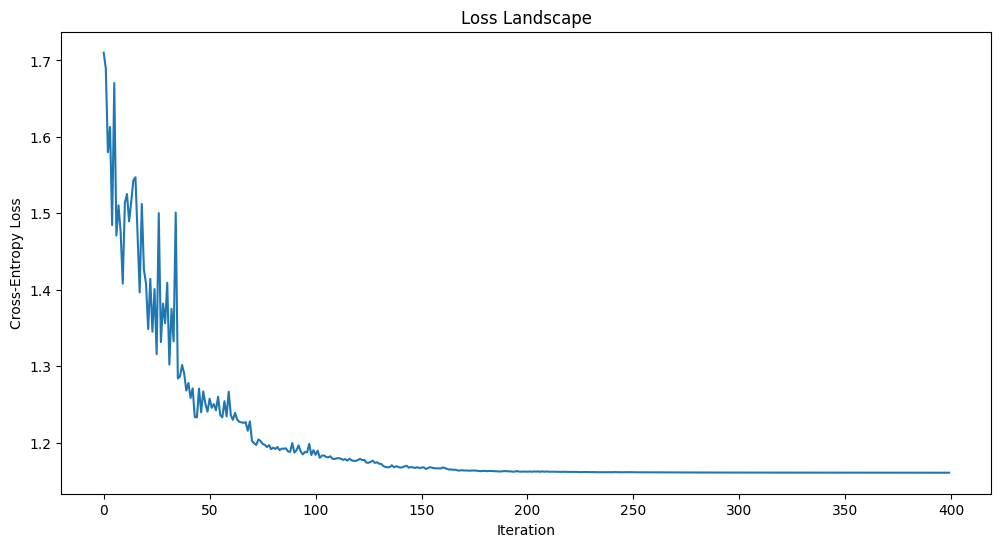

In [22]:
objective_func_vals = []
vqc.fit(X_train, y_train)

In [25]:
score = vqc.score(X_test, y_test)
print(f"Accuracy: {score * 100:.2f}%")

Accuracy: 76.67%


Training VQC with P_BFGS optimizer:

In [27]:
optimizer = P_BFGS(maxfun=100)
objective_func_vals = []

vqc_2 = VQC(num_qubits=num_qubits,
           feature_map=feature_map,
           ansatz=ansatz,
           optimizer=optimizer,
           callback=callback_graph)

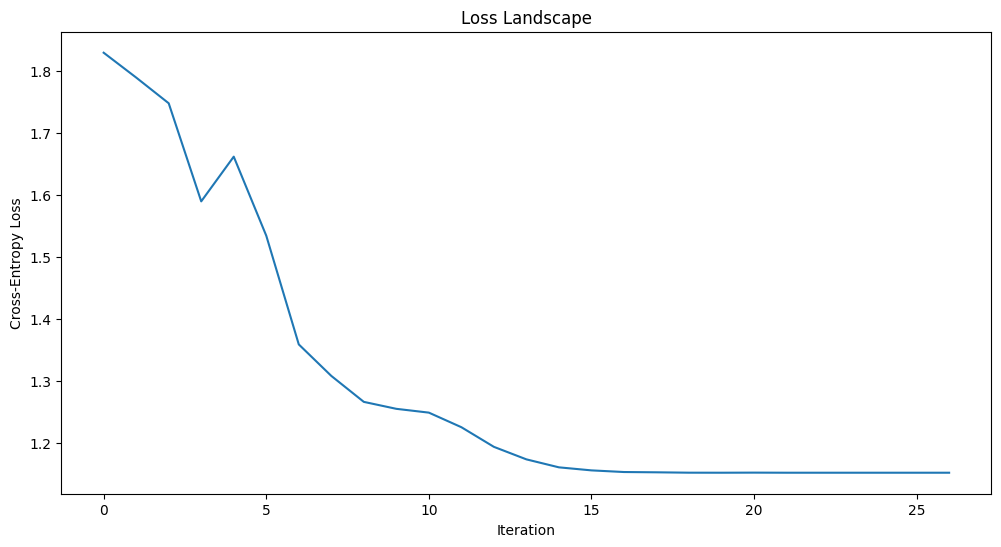

In [28]:
objective_func_vals = []
vqc_2.fit(X_train, y_train)

In [29]:
score = vqc_2.score(X_test, y_test)
print(f"Accuracy: {score * 100:.2f}%")

Accuracy: 73.33%


The VQCs with COBYLA(gradient-free) and P_BFGS(gradient-based) optimizers both performed well with COBYLA having performed slightly better.